In [13]:
#Import pacakges for wrangling and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [14]:
#Import data file
mushroom_data = pd.read_csv("C:/Users/evere/OneDrive/Documents/Springboard/Capstone Project/MushroomDataset/secondary_data.csv", sep=';')

In [15]:
mushroom_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [16]:
#Let's look at at columns missing the most values
missing = pd.concat([mushroom_data.isnull().sum(), 100 * mushroom_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
class,0,0.000000
has-ring,0,0.000000
stem-color,0,0.000000
habitat,0,0.000000
stem-height,0,0.000000
gill-color,0,0.000000
stem-width,0,0.000000
does-bruise-or-bleed,0,0.000000
cap-color,0,0.000000
cap-shape,0,0.000000


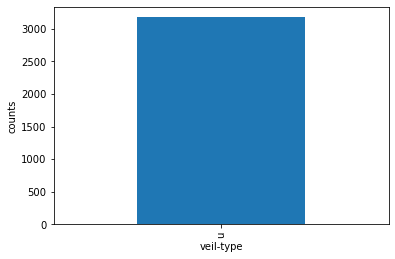

In [17]:
#veil-type has 95% of it's values missing. Let's see what the data looks like.

mushroom_data['veil-type'].value_counts().plot.bar()
plt.xlabel('veil-type')
plt.ylabel('counts')
plt.show()

In [18]:
#Drop it since there is only 1 object for only 5% of data
mushroom_data.drop('veil-type',axis=1,inplace=True)

In [19]:
#Let's fill in empty values with unknowns
mushroom_data = mushroom_data.fillna(value='unknown')

In [20]:
mushroom_data.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [21]:
#Check to see what our types are
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-color            61069 non-null  object 
 15  has-ring           

In [22]:
#Change the float64's to categories by placing the values into quartile range objects
mushroom_data['cap-diameter'] = pd.qcut(mushroom_data['cap-diameter'],4,['1stQ','2ndQ','3rdQ','4thQ'])

In [23]:
mushroom_data['stem-width'] = pd.qcut(mushroom_data['stem-width'],4,['1stQ','2ndQ','3rdQ','4thQ'])

In [24]:
mushroom_data['stem-height'] = pd.qcut(mushroom_data['stem-height'],4,['1stQ','2ndQ','3rdQ','4thQ'])

In [25]:
#For convience let's rename our target column 'class' to 'poisonous' 
mushroom_data.rename(columns={'class':'poisonous'},inplace=True)

# EDA

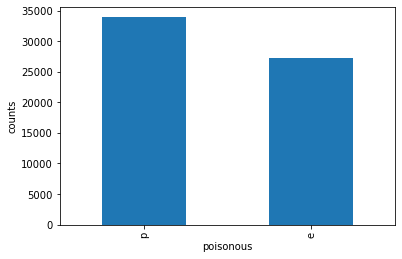

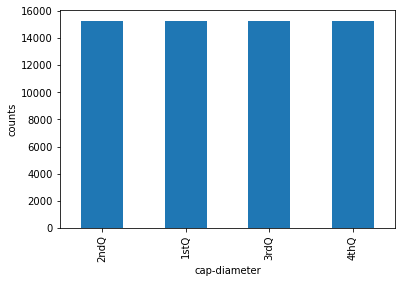

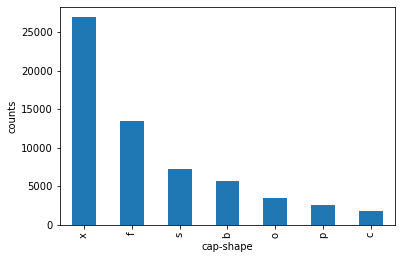

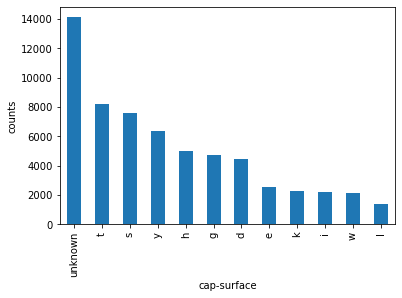

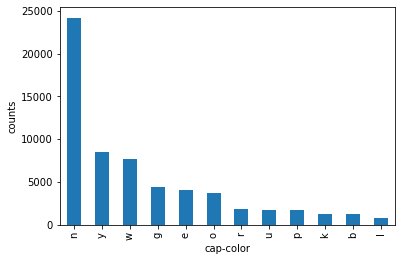

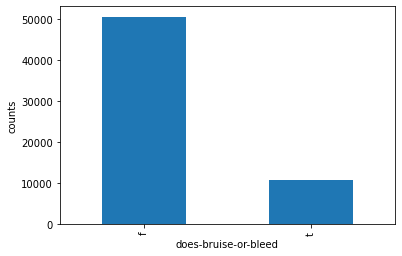

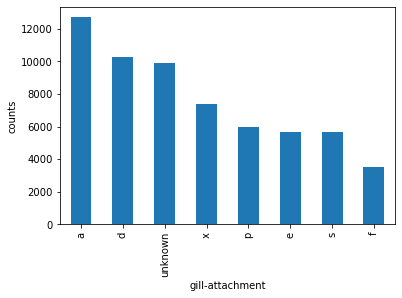

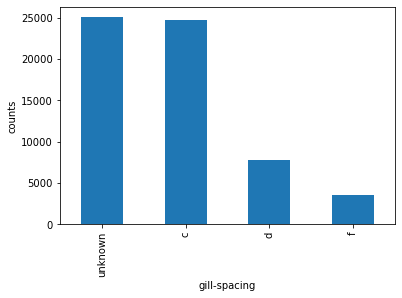

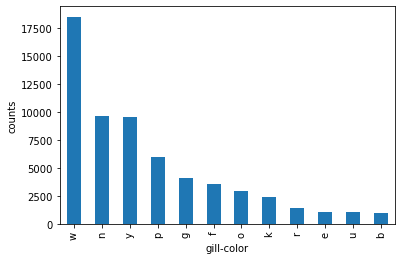

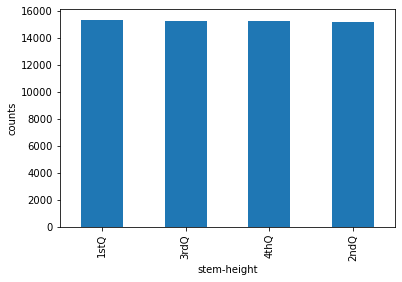

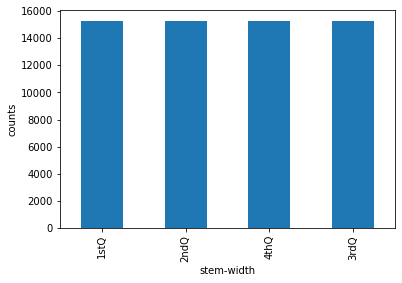

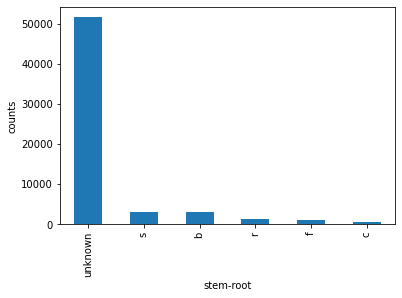

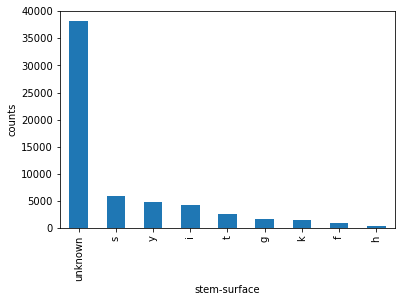

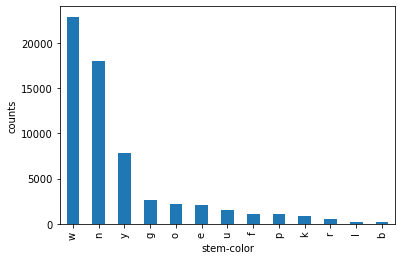

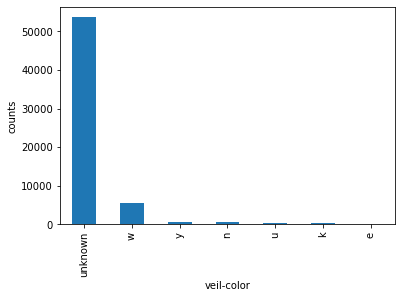

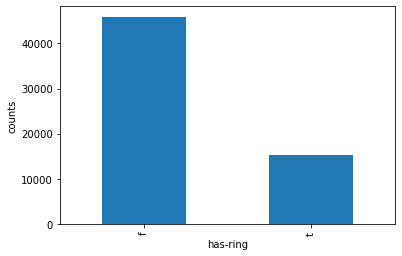

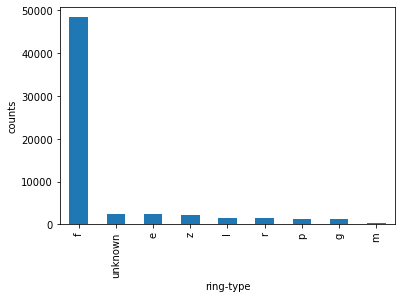

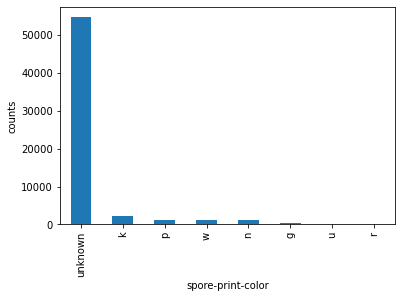

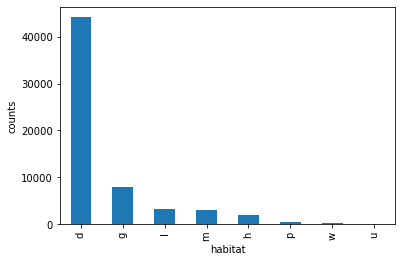

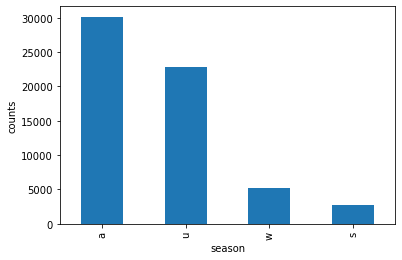

In [26]:
for feature in mushroom_data.columns:
    mushroom_data[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.show()

In [27]:
features = [ feature for feature in mushroom_data.columns if feature != 'poisonous' ]

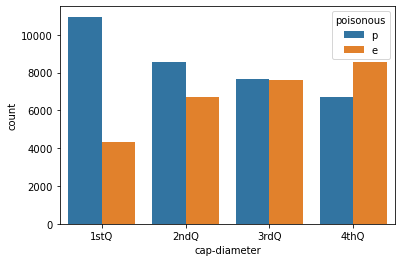

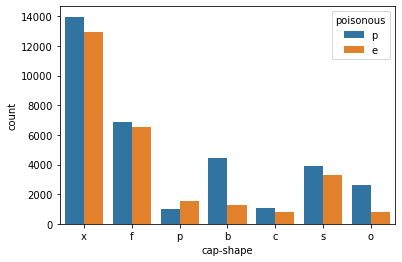

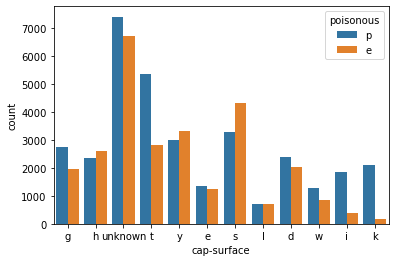

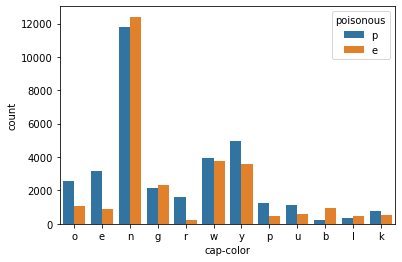

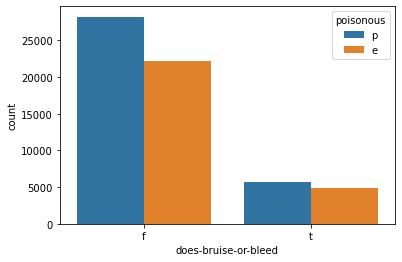

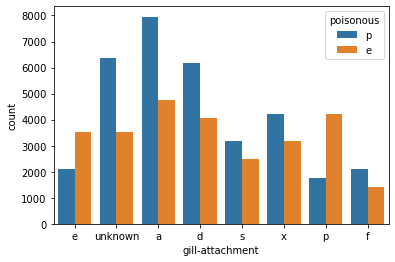

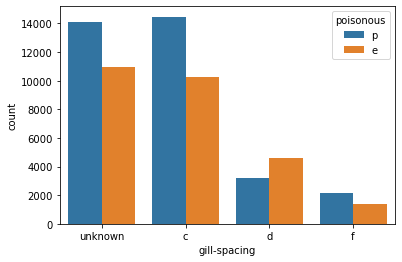

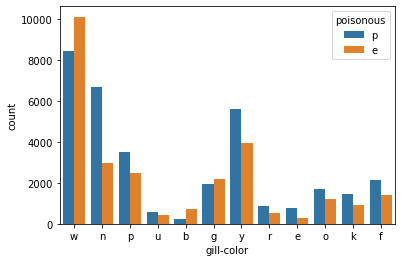

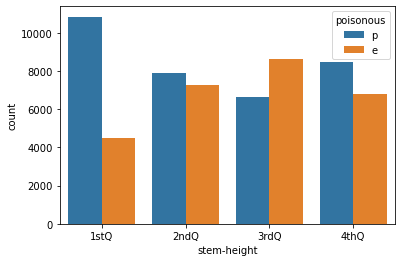

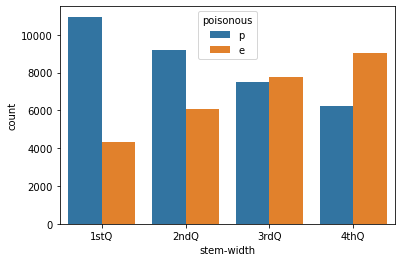

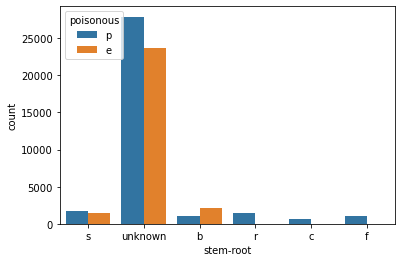

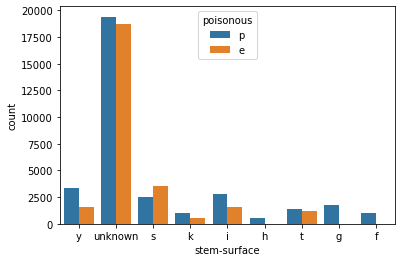

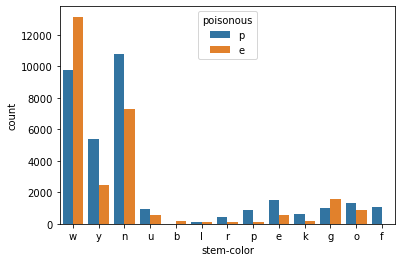

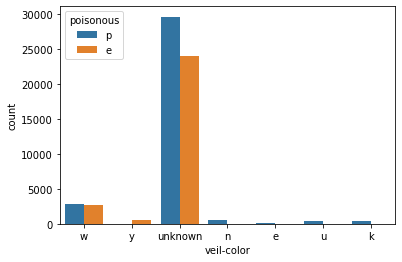

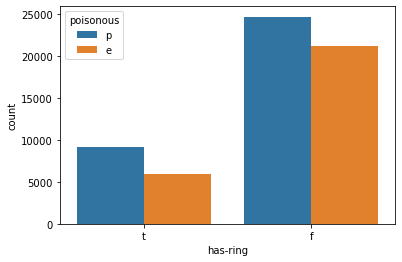

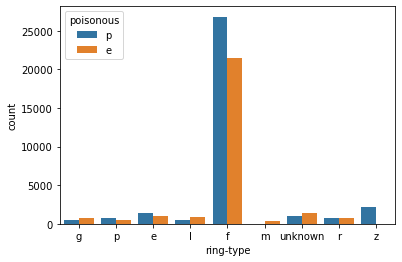

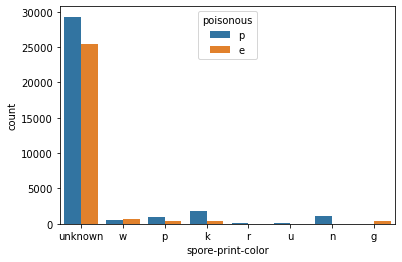

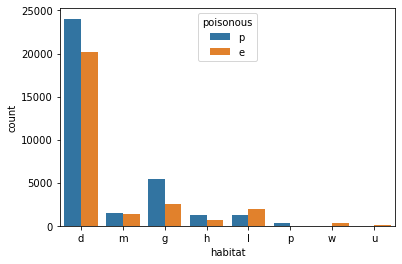

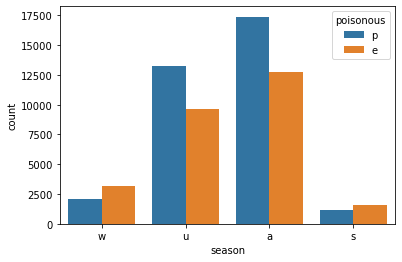

In [28]:
for feature in features:
    sns.countplot(x=feature,data=mushroom_data,hue='poisonous')
    plt.show()